In [1]:
# Importing numpy & pandas
import numpy as np
import pandas as pd

# Importing matplotlib & seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="ticks")

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.python.keras.layers.core import Dense,Dropout,Activation,Flatten
#from keras.layers.convolutional import Conv2D,MaxPooling2D
from tensorflow.python.keras.utils import np_utils
from sklearn import metrics

In [2]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [4]:
tf.random.set_seed(42)

In [5]:
from tensorflow.python import keras

## 1. Read the data set

In [6]:
# Read the data set
df=pd.read_csv('bank.csv')

In [7]:
# Check the Dataframe 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis (EDA)

In [8]:
# Check number of records in the dataset
print (f'Number of records in the dataset = {"{:,}".format(df.shape[0])}')

Number of records in the dataset = 10,000


In [9]:
# Check number of columns in the dataset
print (f'Number of columns in the dataset = {"{:,}".format(df.shape[1])}')

Number of columns in the dataset = 14


In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
# Check data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values in the dataset

In [13]:
# Check for the number of unique records in each column
for i in df.columns :
    print('%s : '%(i),df[i].nunique())

RowNumber :  10000
CustomerId :  10000
Surname :  2932
CreditScore :  460
Geography :  3
Gender :  2
Age :  70
Tenure :  11
Balance :  6382
NumOfProducts :  4
HasCrCard :  2
IsActiveMember :  2
EstimatedSalary :  9999
Exited :  2


In [14]:
# Check for the unique records in each column
for i in df.columns :
    print('%s : '%(i),df[i].unique())

RowNumber :  [    1     2     3 ...  9998  9999 10000]
CustomerId :  [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname :  ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore :  [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 8

### Univariate Analysis

#### Not considering RowNumber,CustomerId & Surname for Univariate Analysis as it doesn't make any sense.

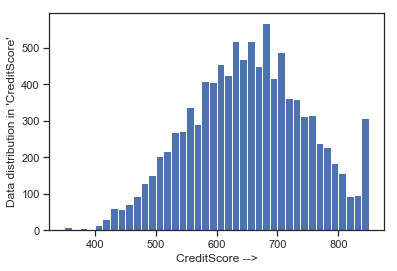

In [15]:
# Data distribution in 'CreditScore'
plt.xlabel("CreditScore -->")
plt.ylabel("Data distribution in 'CreditScore'")
plt.hist(df['CreditScore'], bins=40)
plt.show()

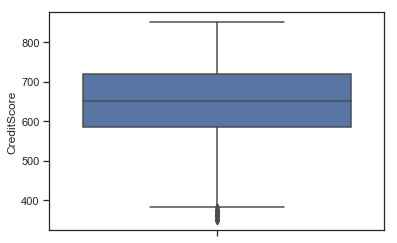

In [16]:
sns.boxplot(df['CreditScore'],orient = 'v')

In [17]:
print("The CreditScore is distributed in a bell shaped curve, with mean value of CreditScore = ",df['CreditScore'].mean())

The CreditScore is distributed in a bell shaped curve, with mean value of CreditScore =  650.5288


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


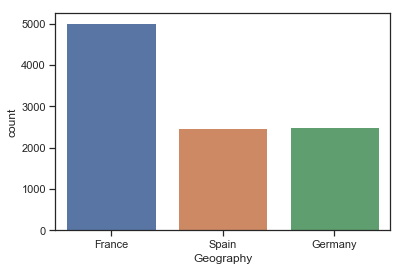

In [18]:
# Data distribution in 'Geography'
print(df['Geography'].value_counts())
sns.countplot(df['Geography'])
plt.show()

In [19]:
print("There are 50% of customers from France. Germany & Spain have 25% each")

There are 50% of customers from France. Germany & Spain have 25% each


Male      5457
Female    4543
Name: Gender, dtype: int64


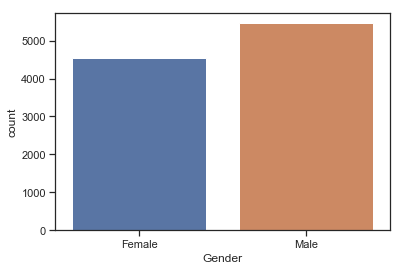

In [20]:
# Data distribution in 'Gender'
print(df['Gender'].value_counts())
sns.countplot(df['Gender'])
plt.show()

In [21]:
print("The number of Male customers is slightly higher than Female customers")

The number of Male customers is slightly higher than Female customers


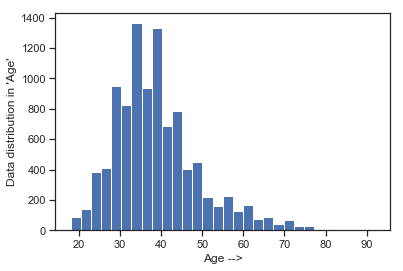

In [22]:
# Data distribution in 'Age'
plt.xlabel("Age -->")
plt.ylabel("Data distribution in 'Age'")
plt.hist(df['Age'], bins=30)
plt.show()

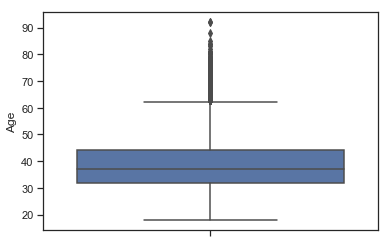

In [23]:
sns.boxplot(df['Age'], orient = 'v')

In [24]:
print("There are more number of customers with Age between 30-50, with mean value of Age = ",df['Age'].mean())

There are more number of customers with Age between 30-50, with mean value of Age =  38.9218


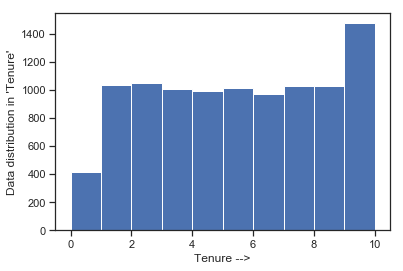

In [25]:
# Data distribution in 'Tenure'
plt.xlabel("Tenure -->")
plt.ylabel("Data distribution in 'Tenure'")
plt.hist(df['Tenure'])
plt.show()

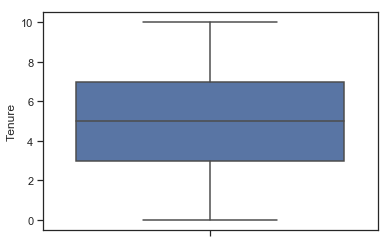

In [26]:
sns.boxplot(df['Tenure'], orient = 'v')

In [27]:
print("Tenure is uniformally distributed")

Tenure is uniformally distributed


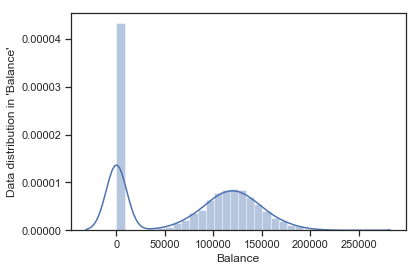

In [28]:
# Data distribution in 'Balance'
plt.xlabel("Balance -->")
plt.ylabel("Data distribution in 'Balance'")
sns.distplot(df['Balance'],bins=30)
plt.show()

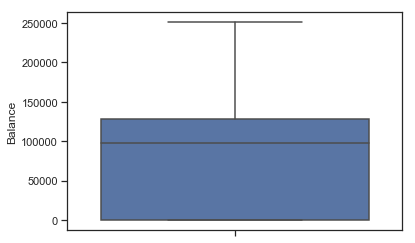

In [29]:
sns.boxplot(df['Balance'], orient = 'v')

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


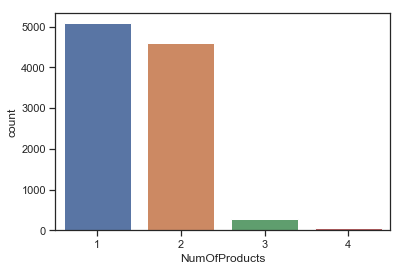

In [30]:
# Data distribution in 'NumOfProducts'
print(df['NumOfProducts'].value_counts())
sns.countplot(df['NumOfProducts'])
plt.show()

In [31]:
print("Nearly 51% of customers have at least 1 product and 46% of customers have 2 products.")

Nearly 51% of customers have at least 1 product and 46% of customers have 2 products.


1    7055
0    2945
Name: HasCrCard, dtype: int64


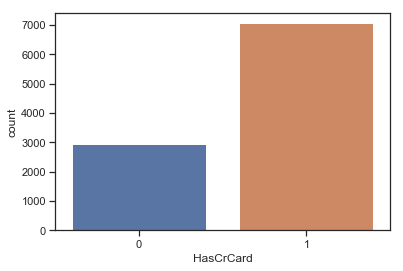

In [32]:
# Data distribution in 'HasCrCard'
print(df['HasCrCard'].value_counts())
sns.countplot(df['HasCrCard'])
plt.show()

In [33]:
print("More than 70% of the customers have Credit Card.")

More than 70% of the customers have Credit Card.


1    5151
0    4849
Name: IsActiveMember, dtype: int64


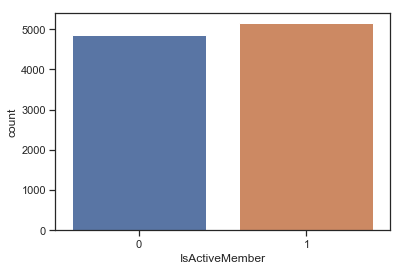

In [34]:
# Data distribution in 'Gender'
print(df['IsActiveMember'].value_counts())
sns.countplot(df['IsActiveMember'])
plt.show()

In [35]:
print("Only around 51.51% of the customers are Active Members.")

Only around 51.51% of the customers are Active Members.


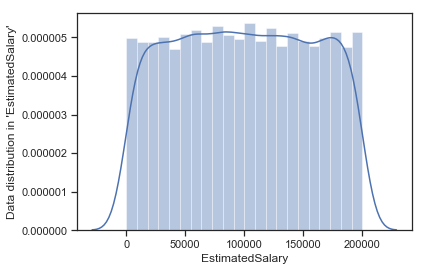

In [36]:
# Data distribution in 'EstimatedSalary'
plt.xlabel("EstimatedSalary -->")
plt.ylabel("Data distribution in 'EstimatedSalary'")
sns.distplot(df['EstimatedSalary'])
plt.show()

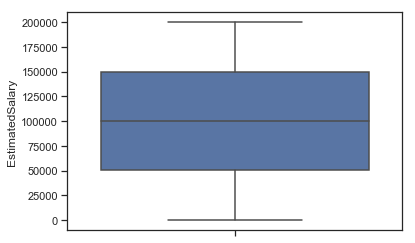

In [37]:
sns.boxplot(df['EstimatedSalary'], orient = 'v')

In [38]:
mean_EstimatedSalary=df['EstimatedSalary'].mean()
print(f'The estimated salary is uniformally distributed, with mean value of EstimatedSalary = {"{:,}".format(mean_EstimatedSalary)}')

The estimated salary is uniformally distributed, with mean value of EstimatedSalary = 100,090.2398809998


0    7963
1    2037
Name: Exited, dtype: int64


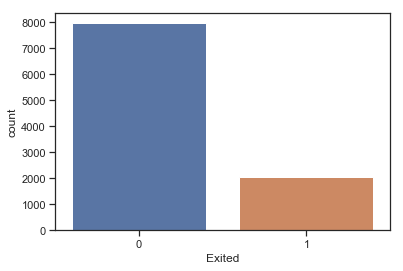

In [39]:
# Data distribution in 'Exited', Target variable
print(df['Exited'].value_counts())
sns.countplot(df['Exited'])
plt.show()

In [40]:
print("The number of customers who left bank is around 20%.")

The number of customers who left bank is around 20%.


## 2. Drop the columns which are unique for all users like IDs (2.5 points)

#### We can remove the columns ('RowNumber','CustomerId','Surname'), as these features do not effect the prediction.

In [41]:
# Columns before dropping
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [42]:
df.drop(columns=['RowNumber', 'CustomerId','Surname'],inplace=True)

In [43]:
# Columns after dropping
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## 3. Distinguish the feature and target set (2.5 points)

In [44]:
# Create feature matrix
X = df.drop(columns=['Exited'])

# Create target vector
y_actual = df['Exited']

In [45]:
# Check the feature set
print("Shape of feature set : ",X.shape)
X.head()

Shape of feature set :  (10000, 10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [46]:
# Check the target set
print("Shape of feature set : ",y_actual.shape)
y_actual.head()

Shape of feature set :  (10000,)


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [47]:
# convert categorical feature into dummy variables

countries=pd.get_dummies(X['Geography'])
gender=pd.get_dummies(X['Gender'])

In [48]:
#concatenate the remaining dummies columns
X=pd.concat([X,countries,gender],axis=1)

In [49]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [50]:
#drop the columns as it is no longer required

X=X.drop(['Geography','Gender'],axis=1)

In [51]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [52]:
X.shape

(10000, 13)

## 4. Divide the data set into training and test sets ( 2.5 points)

In [53]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_actual, test_size=0.2, random_state=0)

In [54]:
X_train[:5]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,0,1,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,0,1,0,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,1,0,0,1,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,0,1,0,1
356,850,57,8,126776.30,2,1,1,132298.49,0,0,1,1,0


In [55]:
y_train[:5]

7389    0
9275    0
2995    0
5316    0
356     0
Name: Exited, dtype: int64

In [56]:
# Converting features to numpy array with dtype=float32
X_train=X_train.astype('float32').to_numpy()

In [57]:
# check shape of feature
X_train.shape

(8000, 13)

In [58]:
# Converting label to numpy array with dtype=float32
y_train=y_train.astype('float32').to_numpy()

In [59]:
y_train.shape

(8000,)

## 5. Normalize the train and test data (5 points)

In [60]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler() 
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

C:\Users\veeresh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\veeresh\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [64]:
# Converting features to dtype=float32
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

## 6. Initialize & build the model (10 points)

In [65]:
# Importing the Keras libraries and packages
from tensorflow.python import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [66]:
# Initialising the ANN
classifier = Sequential()

In [67]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=13, units=26, kernel_initializer="uniform"))

In [68]:
# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=26, kernel_initializer="uniform"))

In [69]:
# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [70]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [71]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1, epochs = 100)

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.4373 - accuracy: 0.8049
Epoch 2/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.4225 - accuracy: 0.8250
Epoch 3/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.3942 - accuracy: 0.8409
Epoch 4/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.3544 - accuracy: 0.8566
Epoch 5/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.3480 - accuracy: 0.8576
Epoch 6/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.3474 - accuracy: 0.8587
Epoch 7/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.3447 - accuracy: 0.8576
Epoch 8/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.3430 - accuracy: 0.8589
Epoch 9/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.3422 - accuracy: 0.8606
Epoch 10/100
8000/8000 [

8000/8000 [==============================] - 12s 2ms/sample - loss: 0.2978 - accuracy: 0.8814
Epoch 78/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.2978 - accuracy: 0.8817
Epoch 79/100
8000/8000 [==============================] - 12s 2ms/sample - loss: 0.2981 - accuracy: 0.8826
Epoch 80/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.2987 - accuracy: 0.8815
Epoch 81/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.2979 - accuracy: 0.8827
Epoch 82/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.2963 - accuracy: 0.8845
Epoch 83/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.2958 - accuracy: 0.8823
Epoch 84/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.2957 - accuracy: 0.8840
Epoch 85/100
8000/8000 [==============================] - 13s 2ms/sample - loss: 0.2964 - accuracy: 0.8825
Epoch 86/100
8000/8000 [==========================

In [72]:
# Train neural network
# model.fit(X_train, # Features
#             y_train, # Target
#             epochs=100, # Number of epochs
#             verbose=1, # print description after each epoch
#             batch_size=1, # Number of observations per batch
#             validation_data=(X_test, y_test)) # Data for evaluation

# model.fit(X_train, y_train, batch_size = 10, epochs = 100)

## 7. Predict the results using 0.5 as a threshold (5 points)

In [73]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

## 8. Print the Accuracy score and confusion matrix (2.5 points)

In [74]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)

In [75]:
print(accuracy)

0.853


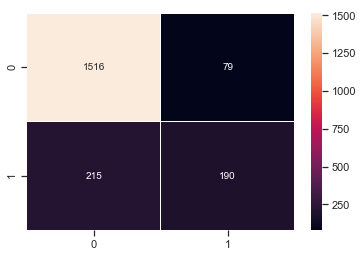

In [76]:
sns.heatmap(cm,annot=True,fmt='d', linewidths=.5)

In [77]:
from sklearn.metrics import classification_report,roc_auc_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.71      0.47      0.56       405

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [78]:
roc = roc_auc_score(y_test,y_pred)
print(roc)

0.7098030109524361
